# DD2421 Lab 2

**Authors:** Navid Farhadi (nfarhadi@kth.se), Arturs Kurzemnieks (artursk@kth.se)

**Course Instance:** DD2421 Machine Learning VT19

In [8]:
import numpy, random, math
from scipy.optimize import minimize 
import matplotlib.pyplot as plt

# Global Variables
classA = None
classB = None
inputs = None
targets = None
N = None
kernel_type = None
p = None
sigma = None
support_vectors = None
threshold = None
P = None
support_vector = None
C = None

In [39]:
def run(kernel_type_input = 'linear', p_input = 1, sigma_input = 1, C_input=1, spread=0.2):
    global N 
    global alpha 
    global targets 
    global inputs 
    global kernel_type 
    global p 
    global sigma 
    global threshold 
    global P 
    global classA 
    global classB 
    global support_vectors
    global b 
    global support_vector
    global C
    
    numpy.random.seed(100)
    
    threshold = math.pow(10, -5)
    
    classA = numpy.concatenate((numpy.random.randn(10, 2) * spread + [1.5, 0.5], 
                            numpy.random.randn(10, 2) * spread + [-1.5, 0.5])) 
    classB = numpy.random.randn(20, 2) * spread + [0.0, -0.5]

    inputs = numpy.concatenate((classA, classB)) 
    targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))
    N = inputs.shape[0] 
    permute = list(range(N)) 
    random.shuffle(permute) 
    inputs = inputs[permute, :]
    targets = targets[permute]

    kernel_type = kernel_type_input
    p = p_input
    sigma = sigma_input
    support_vectors = []
    C = C_input
    
    P = numpy.zeros([N,N])
    
    XC={'type':'eq', 'fun':zerofun}
    start = numpy.zeros(N)
    
    compute_P()

    ret = minimize(objective, start, bounds=[(0, C) for b in range(N)], constraints=XC)
    
    b = None
    
    if(ret['success']):
        print("Optimization Ran Successfully")
        alpha = ret['x']
        extract_nonzero_alpha()
        
        if(len(support_vectors) == 0):
            print("No valid support vectors found")
        else:
            support_vector = support_vectors[0]
            b = 0 - support_vector[2]
            for i in range(N):
                b += alpha[i] * targets[i] * kernel(support_vector[1],inputs[i])
            plot_with_line()
            
            print("Kernel = " + str(kernel_type))
            print("C = " + str(C))
            print("p = " + str(p))
            print("sigma = " + str(sigma))
            
    else:
        print("Optimization Not Successful")
        print("Message: " + ret['message'])
        plot_without_line()

def kernel(x1,x2):
    if(kernel_type == "linear"):
        return numpy.dot(numpy.transpose(x1),x2)
    if(kernel_type == "polynomial"):
        return (numpy.dot(numpy.transpose(x1),x2) + 1)**p
    if(kernel_type == "RBF"):
        return math.exp(-(numpy.linalg.norm(x1-x2)**2) / (2*(sigma**2)))

def compute_P():
    for i in range(N):
        for j in range(N):
            P[i][j] = targets[i] * targets[j] * kernel(inputs[i],inputs[j])

def objective(alpha):
    return 0.5*(numpy.dot(numpy.dot(alpha, P), alpha)) - numpy.sum(alpha)

def zerofun(alpha):
    return numpy.dot(alpha,targets)

def extract_nonzero_alpha():
    if(C == None):
        for i in range(N):
            if(alpha[i] > threshold):
                support_vectors.append([alpha[i], inputs[i], targets[i]])
    else:
        for i in range(N):
            if(alpha[i] > threshold and alpha[i] < C - threshold):
                support_vectors.append([alpha[i], inputs[i], targets[i]])

def indicator(x,y):
    sum = 0
    for i in range(N):
        sum += alpha[i] * targets[i] * kernel([x,y],inputs[i])

    return sum-b
    
def plot_with_line():
    
    xgrid = numpy.linspace(-3, 3)
    ygrid = numpy.linspace(-2, 2)
    
    grid = numpy.array([[indicator(x, y) for x in xgrid] for y in ygrid])
    
    plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1,3,1))
    
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
    plt.show()
    
def plot_without_line():
    
    xgrid = numpy.linspace(-3, 3)
    ygrid = numpy.linspace(-2, 2)
    
    plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
    plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
    plt.show()



### Test

Optimization Ran Successfully


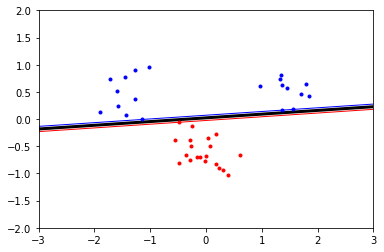

Kernel = linear
C = None
p = 1
sigma = 1


In [43]:
run('linear',1,1,None,0.3)

Optimization Not Successful
     fun: -499453.30282523594
     jac: array([ 9.91718750e+01,  7.46679688e+01,  1.26894531e+02,  4.53632812e+01,
        1.54156250e+02,  5.79921875e+01,  4.91367188e+01,  6.25117188e+01,
       -4.75156250e+01, -2.94921875e+00, -6.51992188e+01, -3.35156250e+01,
       -2.37265625e+01, -8.39453125e+00, -2.65039062e+01,  4.68750000e-02,
       -2.94101562e+01, -3.32031250e+00, -3.50156250e+01, -5.32656250e+01,
        2.90234375e+01,  2.60937500e+00, -5.79296875e+00,  1.62734375e+01,
        1.70507812e+01,  3.51523438e+01,  4.90000000e+01,  5.66796875e+00,
        2.19921875e+00, -1.04335938e+01,  4.56054688e+01,  8.19531250e+00,
        2.65625000e+00,  3.03359375e+01,  3.85039062e+01, -7.10937500e-01,
       -4.58437500e+01,  1.28632812e+01, -3.78867188e+01, -4.54492188e+01])
 message: 'Iteration limit exceeded'
    nfev: 5154
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([2.90715079e+03, 1.37808810e+04, 9.90870482e+03, 1.459134

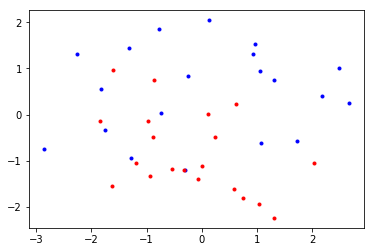

In [52]:
run('linear',1,1,None,1)